In [ ]:
import seaborn as sns 
sns.set_context('talk')
sns.set(rc={
    "axes.labelsize": 18,     
    "axes.titlesize": 18,        
    "xtick.labelsize": 14,       
    "ytick.labelsize": 14,      
    "legend.fontsize": 24,       
    "axes.facecolor": "white",   
    "figure.facecolor": "white"  
})
sns.set_style("white")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import os
import numpy as np

results_folder = './Case3_checks_all_7_PP/6. results'  # Update this path to your results folder
csv_file = os.path.join(results_folder, 'complete_results.csv')
df = pd.read_csv(csv_file)

# Create the figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# First subplot: (Cotton + Rice) vs Wheat, colored by Annual Water Scarcity
scatter1 = ax1.scatter(df['Cotton_Demand'] + df['Rice_Demand'], 
                       df['Wheat_Demand'], 
                       c=df['Annual_Scarcity'], 
                       cmap='coolwarm', 
                       alpha=0.7)

ax1.set_xlabel('Cotton + Rice Demand')
ax1.set_ylabel('Wheat Demand')
ax1.set_title('(Cotton + Rice) vs Wheat Demand\nColored by Annual Water Scarcity')
cbar1 = plt.colorbar(scatter1, ax=ax1)
cbar1.set_label('Annual Water Scarcity')

colors = ['red', 'yellow', 'blue']
cmap = ListedColormap(colors)

# Plot: (Cotton + Rice) vs Wheat, colored by Storage Adequacy Points
scatter2 = ax2.scatter(df['Cotton_Demand'] + df['Rice_Demand'], 
                     df['Wheat_Demand'], 
                     c=df['Storage_Adequacy_Points'], 
                     cmap=cmap, 
                     vmin=-0.5, vmax=2.5,
                     alpha=0.7)

ax2.set_xlabel('Cotton + Rice Demand')
ax2.set_ylabel('Wheat Demand')
ax2.set_title('(Cotton + Rice) vs Wheat Demand\nColored by Storage Adequacy Points')


legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label='Inadequate (0)',
                              markerfacecolor='red', markersize=10),
                   plt.Line2D([0], [0], marker='o', color='w', label='Adequate for Potential (1)',
                              markerfacecolor='yellow', markersize=10),
                   plt.Line2D([0], [0], marker='o', color='w', label='Adequate for Current (2)',
                              markerfacecolor='blue', markersize=10)]
ax2.legend(handles=legend_elements, loc='best')


plt.tight_layout()
output_file = os.path.join(results_folder, 'demand_vs_storage_adequacy_plot.png')
#plt.savefig(output_file, dpi=300, bbox_inches='tight')
print(f"Plot saved as {output_file}")
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.colors import ListedColormap, BoundaryNorm
import os
import numpy as np

results_folder = './Case3_checks_all_7_PP/6. results'  # Update this path to your results folder
csv_file = os.path.join(results_folder, 'complete_results.csv')
df = pd.read_csv(csv_file)

# def create_demand_plots(x_data, y_data, x_label, y_label, output_file):
#     fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

#     # First subplot: colored by Annual Water Scarcity
#     scatter1 = ax1.scatter(x_data, y_data, 
#                            c=df['Annual_Scarcity'], 
#                            cmap='coolwarm', 
#                            alpha=0.7)
#     ax1.set_xlabel(x_label)
#     ax1.set_ylabel(y_label)
#     ax1.set_title(f'{x_label} vs {y_label}\nColored by Annual Water Scarcity')
#     cbar1 = plt.colorbar(scatter1, ax=ax1)
#     cbar1.set_label('Annual Water Scarcity')

#     # Second subplot: colored by Storage Adequacy Points
#     colors = ['red', 'yellow', 'blue']
#     cmap = ListedColormap(colors)
#     scatter2 = ax2.scatter(x_data, y_data, 
#                            c=df['Storage_Adequacy_Points'], 
#                            cmap=cmap, 
#                            vmin=-0.5, vmax=2.5,
#                            alpha=0.7)
#     ax2.set_xlabel(x_label)
#     ax2.set_ylabel(y_label)
#     ax2.set_title(f'{x_label} vs {y_label}\nColored by Storage Adequacy Points')

#     legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label='Inadequate (0)',
#                                   markerfacecolor='red', markersize=10),
#                        plt.Line2D([0], [0], marker='o', color='w', label='Adequate for Potential (1)',
#                                   markerfacecolor='yellow', markersize=10),
#                        plt.Line2D([0], [0], marker='o', color='w', label='Adequate for Current (2)',
#                                   markerfacecolor='blue', markersize=10)]
#     ax2.legend(handles=legend_elements, loc='best')

#     plt.tight_layout()
#     plt.savefig(output_file, dpi=300, bbox_inches='tight')
#     print(f"Plot saved as {output_file}")
#     plt.show()
#     #plt.close()

def create_demand_plots(x_data, y_data, x_label, y_label, output_file):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

    # First subplot: colored by Annual Water Scarcity (discrete scale)
    scarcity_bounds = [0, 1, 2, 3, 4, 5, 6]
    scarcity_norm = BoundaryNorm(scarcity_bounds, 6)
    scarcity_cmap = plt.get_cmap('coolwarm', 6)
    
    scatter1 = ax1.scatter(x_data, y_data, 
                           c=df['Annual_Scarcity'], 
                           cmap=scarcity_cmap,
                           norm=scarcity_norm,
                           alpha=0.7)
    ax1.set_xlabel(x_label)
    ax1.set_ylabel(y_label)
    ax1.set_title(f'{x_label} vs {y_label}\nColored by Annual Water Scarcity')
    cbar1 = plt.colorbar(scatter1, ax=ax1, ticks=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5])
    cbar1.set_label('Annual Water Scarcity')
    cbar1.ax.set_yticklabels(['0-1', '1-2', '2-3', '3-4', '4-5', '5-6'])

    # Second subplot: colored by Storage Adequacy Points
    colors = ['red', 'yellow', 'blue']
    cmap = ListedColormap(colors)
    scatter2 = ax2.scatter(x_data, y_data, 
                           c=df['Storage_Adequacy_Points'], 
                           cmap=cmap, 
                           vmin=-0.5, vmax=2.5,
                           alpha=0.7)
    ax2.set_xlabel(x_label)
    ax2.set_ylabel(y_label)
    ax2.set_title(f'{x_label} vs {y_label}\nColored by Storage Adequacy Points')

    legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label='Inadequate (0)',
                                  markerfacecolor='red', markersize=10),
                       plt.Line2D([0], [0], marker='o', color='w', label='Adequate for Potential (1)',
                                  markerfacecolor='yellow', markersize=10),
                       plt.Line2D([0], [0], marker='o', color='w', label='Adequate for Current (2)',
                                  markerfacecolor='blue', markersize=10)]
    ax2.legend(handles=legend_elements, loc='best')

    plt.tight_layout()
    plt.savefig(output_file, dpi=300, bbox_inches='tight')
    print(f"Plot saved as {output_file}")
    plt.show()
    #plt.close()


# Wheat vs (Sugar + Misc)
create_demand_plots(
    df['Sugarcane_Demand'] + df['Miscellaneous_Demand'],
    df['Wheat_Demand'],
    'Sugar + Misc Demand',
    'Wheat Demand',
    os.path.join(results_folder, 'wheat_vs_sugar_misc_demand_plot.png')
)

# (Sugar + Misc) vs (Cotton + Rice)
create_demand_plots(
    df['Cotton_Demand'] + df['Rice_Demand'],
    df['Sugarcane_Demand'] + df['Miscellaneous_Demand'],
    'Cotton + Rice Demand',
    'Sugar + Misc Demand',
    os.path.join(results_folder, 'sugar_misc_vs_cotton_rice_demand_plot.png')
)


# (Cotton + Rice) vs (Sugar) vs 
create_demand_plots(
    df['Cotton_Demand'] + df['Rice_Demand'],
    df['Sugarcane_Demand'],
    'Cotton + Rice Demand',
    'Sugar',
    os.path.join(results_folder, 'cotton_rice_demand_vs_sugar_plot.png')
)

print("All plots have been generated and saved.")

In [ ]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np

def create_PP_log_grouped(data, output_file):
    # Calculate log of annual scarcity
    data['Log_Annual_Scarcity'] = np.log10(data['Annual_Scarcity'])

    # Sum up the demands as per new categories
    data['Cotton_Rice_Demand'] = data['Cotton_Demand'] + data['Rice_Demand']
    data['Sugar_Misc_Demand'] = data['Sugarcane_Demand'] + data['Miscellaneous_Demand']

    # Prepare the data for the plot
    plot_data = data[['Cotton_Rice_Demand', 'Wheat_Demand', 'Sugar_Misc_Demand', 'Log_Annual_Scarcity', 'Variability', 'Storage_Adequacy_Points']]

    # Define dimension names and ranges for the parallel coordinates
    dimensions = [
        dict(label='Cotton + Rice Demand', values=plot_data['Cotton_Rice_Demand']),
        dict(label='Wheat Demand', values=plot_data['Wheat_Demand']),
        dict(label='Sugar + Misc. Demand', values=plot_data['Sugar_Misc_Demand']),
        dict(label='Log Annual Scarcity', values=plot_data['Log_Annual_Scarcity']),
        dict(label='Variability', values=plot_data['Variability']),
        dict(label='Storage Adequacy', values=plot_data['Storage_Adequacy_Points'])
    ]


    color_scale = [[0, 'red'], [0.5, 'yellow'], [1, '#1f77b4']]  # Normalize positions to 0-1 range cz thats how it works 
    # Create the parallel coordinates plot
    fig = go.Figure(data=
        go.Parcoords(
            line=dict(color=plot_data['Storage_Adequacy_Points'],
                      colorscale= color_scale, # A pre-defined Plotly colorscale
                      showscale=True),
            dimensions=dimensions
        )
    )

    # Update layout
    fig.update_layout(
        title='Grouped Parallel Coordinates Plot of Demand, Metrics, and Log Annual Scarcity',
        plot_bgcolor='white',
        paper_bgcolor='white'
    )

    # Save the plot as an interactive HTML file
    fig.write_html(output_file, auto_open=False)
    print(f"Parallel coordinates plot saved as {output_file}")

# Load your data
results_folder = './Case3_checks_all_7_PP/6. results'  # Update this path to your results folder
csv_file = os.path.join(results_folder, 'complete_results.csv')
data = pd.read_csv(csv_file)

# Create the parallel coordinates plot
output_file = 'grouped_parallel_coordinates_plot.html'
create_PP_log_grouped(data, output_file)


In [ ]:
!pip install plotly orca psutil


In [ ]:
!pip install -U kaleido

In [2]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np
import os

def create_PP_log_grouped(data, output_file_png):
    # Calculate log of annual scarcity
    data['Log_Annual_Scarcity'] = np.log10(data['Annual_Scarcity'])

    # Sum up the demands
    data['Cotton_Rice_Demand'] = data['Cotton_Demand'] + data['Rice_Demand']
    data['Sugar_Misc_Demand'] = data['Sugarcane_Demand'] + data['Miscellaneous_Demand']

    # Prepare the plot data
    plot_data = data[['Cotton_Rice_Demand', 'Wheat_Demand', 'Sugar_Misc_Demand', 'Log_Annual_Scarcity', 'Variability', 'Storage_Adequacy_Points']]

    # Define dimensions for the parallel coordinates plot
    dimensions = [
        dict(label='Cotton + Rice', values=plot_data['Cotton_Rice_Demand']),
        dict(label='Wheat', values=plot_data['Wheat_Demand']),
        dict(label='Sugar+Misc.', values=plot_data['Sugar_Misc_Demand']),
        dict(label='Log Annual Scarcity', values=plot_data['Log_Annual_Scarcity']),
        dict(label='Variability', values=plot_data['Variability']),
        dict(label='Storage Adequacy', values=plot_data['Storage_Adequacy_Points'])
    ]

    # Restore your original color scale
    color_scale = [[0, 'red'], [0.5, 'yellow'], [1, '#1f77b4']] 

    # Create the parallel coordinates plot
    fig = go.Figure(data=go.Parcoords(line=dict(color=plot_data['Storage_Adequacy_Points'], colorscale=color_scale), dimensions=dimensions))

    # Update layout
    fig.update_layout(title='Grouped Parallel Coordinates Plot', plot_bgcolor='white', paper_bgcolor='white')

    # Save the plot as a PNG image with increased DPI
    fig.write_image(output_file_png, scale=6)  # Use the calculated scale factor for 900 DPI

# Example usage
results_folder = './Case3_checks_all_7_PP/6. results'
csv_file = os.path.join(results_folder, 'complete_results.csv')
data = pd.read_csv(csv_file)

output_file_png = 'grouped_parallel_coordinates_plot_900dpi.png'
create_PP_log_grouped(data, output_file_png)


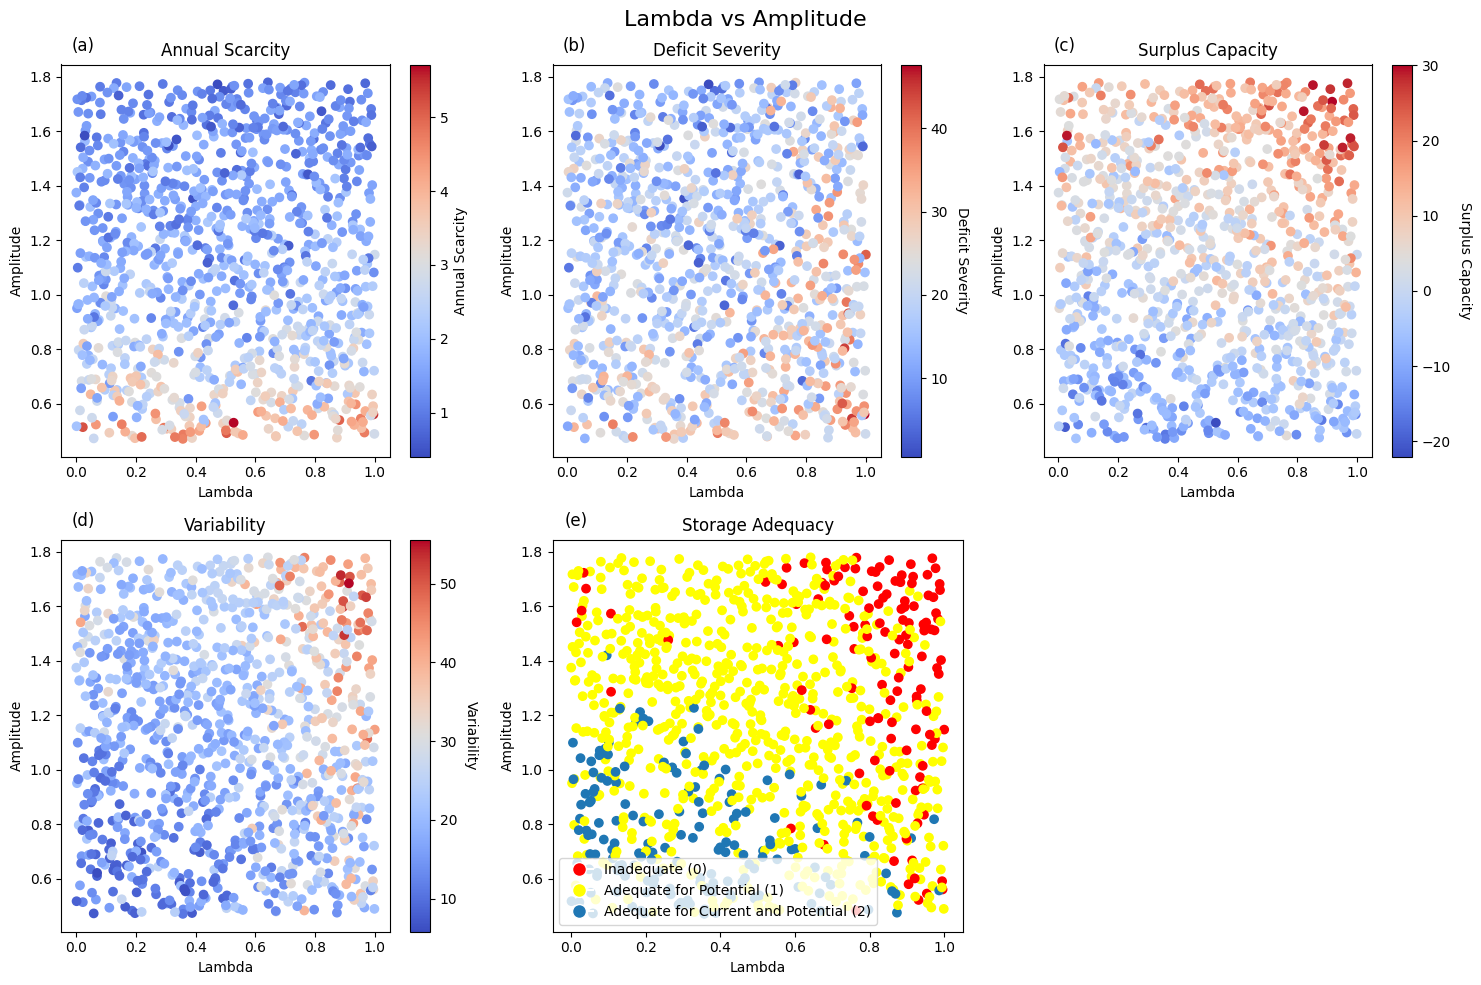

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

def plot_lambda_vs_amplitude_updated_again(data, metrics, output_file):
    descriptive_labels = {
        'Deficit_Severity': 'Deficit Severity',
        'Surplus_Capacity': 'Surplus Capacity',
        'Variability': 'Variability'
    }
    fig, axs = plt.subplots(2, 3, figsize=(15, 10))
    fig.suptitle('Lambda vs Amplitude', fontsize=16)
    
    axs = axs.flatten()
    subplot_labels = ['(a)', '(b)', '(c)', '(d)', '(e)']
    
    for i, metric in enumerate(metrics):
        ax = axs[i]
        
        if metric == 'Annual_Scarcity':
            scatter = ax.scatter(data['Input_lambda'], data['Input_Amplitude'], 
                                 c=data[metric], cmap='coolwarm')
            ax.set_title(f'Annual Scarcity')
            plt.colorbar(scatter, ax=ax, label='Annual Scarcity')
        
        elif metric in ['Deficit_Severity', 'Surplus_Capacity', 'Variability']:
            scatter = ax.scatter(data['Input_lambda'], data['Input_Amplitude'], 
                                 c=data[metric], cmap='coolwarm')
            ax.set_title(descriptive_labels[metric])
            cbar = plt.colorbar(scatter, ax=ax)
            cbar.set_label(descriptive_labels[metric], rotation=270, labelpad=15)
        
        elif metric == 'Storage_Adequacy_Points':
            colors = ['red' if val == 0 else 'yellow' if val == 1 else '#1f77b4' for val in data[metric]]
            scatter = ax.scatter(data['Input_lambda'], data['Input_Amplitude'], c=colors)
            ax.set_title('Storage Adequacy')
            
            from matplotlib.lines import Line2D
            legend_elements = [Line2D([0], [0], marker='o', color='w', label='Inadequate (0)',
                                      markerfacecolor='red', markersize=10),
                               Line2D([0], [0], marker='o', color='w', label='Adequate for Potential (1)',
                                      markerfacecolor='yellow', markersize=10),
                               Line2D([0], [0], marker='o', color='w', label='Adequate for Current and Potential (2)',
                                      markerfacecolor='#1f77b4', markersize=10)]
            ax.legend(handles=legend_elements, loc='best')
        
        ax.set_xlabel('Lambda')
        ax.set_ylabel('Amplitude')
        ax.text(0.03, 1.07, subplot_labels[i], transform=ax.transAxes, fontsize=12,
                verticalalignment='top', bbox=dict(boxstyle='round,pad=0.3', edgecolor='none', facecolor='white'))
    
    fig.delaxes(axs[5])
    
    plt.tight_layout()
    #plt.savefig(output_file, bbox_inches='tight', dpi=600)
    #plt.close()
    plt.show()


results_folder = './Case3_checks_all_7_PP/6. results'
csv_file = os.path.join(results_folder, 'complete_results.csv')
data = pd.read_csv(csv_file)
metrics = metrics = ['Annual_Scarcity', 'Deficit_Severity', 'Surplus_Capacity', 'Variability', 'Storage_Adequacy_Points']
output_file = 'case_3_final_scarcity_storage_adequacy.png'

plot_lambda_vs_amplitude_updated_again(data, metrics, output_file)


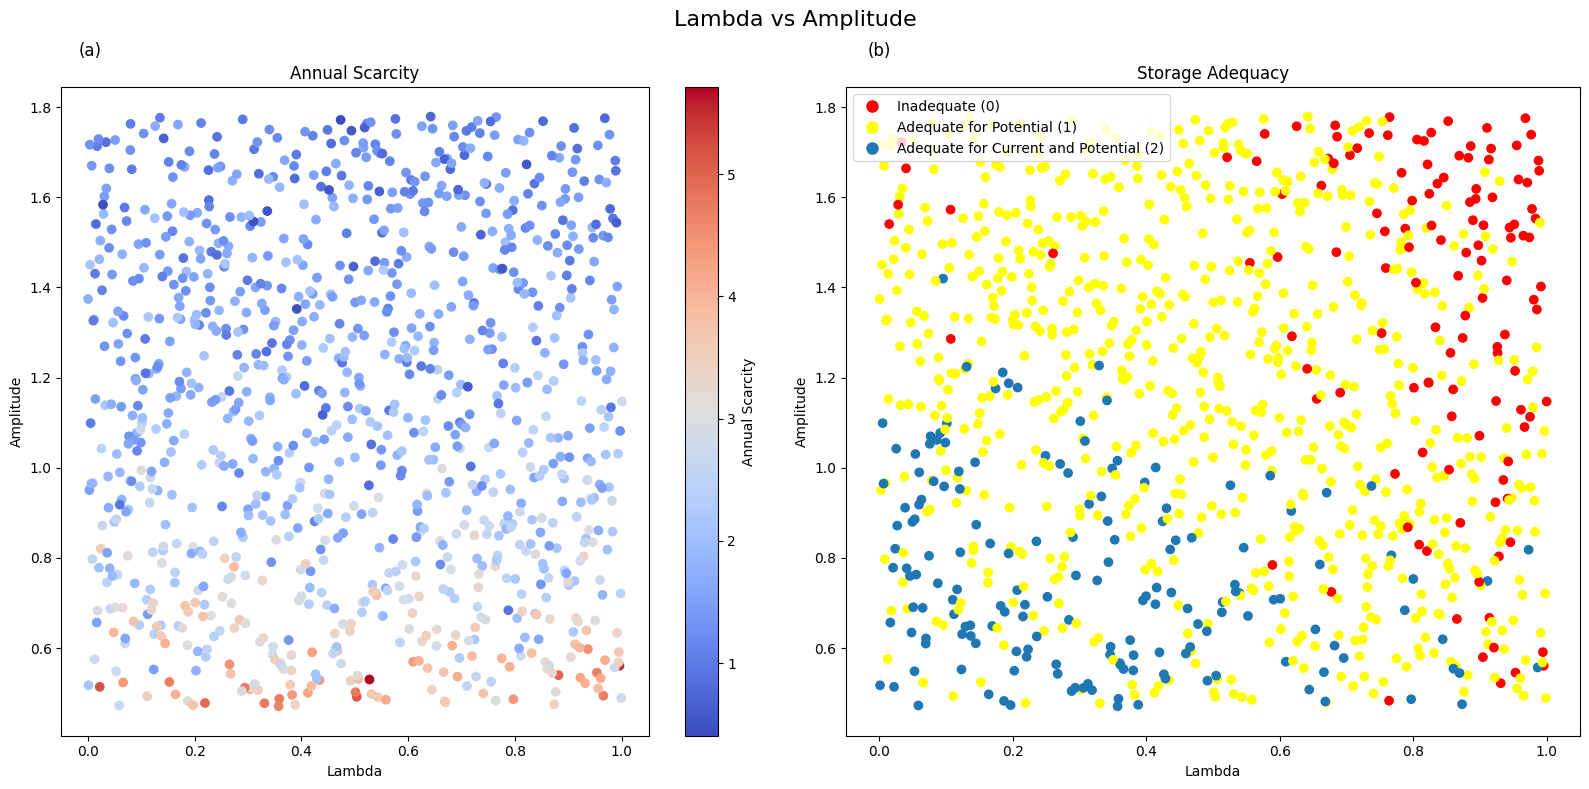

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

def plot_lambda_vs_amplitude_updated_again(data, metrics, output_file):
    descriptive_labels = {
        'Deficit_Severity': 'Deficit Severity',
        'Surplus_Capacity': 'Surplus Capacity',
        'Variability': 'Variability'
    }
    fig, axs = plt.subplots(1, 2, figsize=(16, 8))
    fig.suptitle('Lambda vs Amplitude', fontsize=16)
    
    axs = axs.flatten()
    subplot_labels = ['(a)', '(b)']
    
    for i, metric in enumerate(metrics):
        ax = axs[i]
        
        if metric == 'Annual_Scarcity':
            scatter = ax.scatter(data['Input_lambda'], data['Input_Amplitude'], 
                                 c=data[metric], cmap='coolwarm')
            ax.set_title(f'Annual Scarcity')
            plt.colorbar(scatter, ax=ax, label='Annual Scarcity')
            
        elif metric == 'Storage_Adequacy_Points':
            colors = ['red' if val == 0 else 'yellow' if val == 1 else '#1f77b4' for val in data[metric]]
            scatter = ax.scatter(data['Input_lambda'], data['Input_Amplitude'], c=colors)
            ax.set_title('Storage Adequacy')
            
            from matplotlib.lines import Line2D
            legend_elements = [Line2D([0], [0], marker='o', color='w', label='Inadequate (0)',
                                      markerfacecolor='red', markersize=10),
                               Line2D([0], [0], marker='o', color='w', label='Adequate for Potential (1)',
                                      markerfacecolor='yellow', markersize=10),
                               Line2D([0], [0], marker='o', color='w', label='Adequate for Current and Potential (2)',
                                      markerfacecolor='#1f77b4', markersize=10)]
            ax.legend(handles=legend_elements, loc='best')
        
        ax.set_xlabel('Lambda')
        ax.set_ylabel('Amplitude')
        ax.text(0.03, 1.07, subplot_labels[i], transform=ax.transAxes, fontsize=12,
                verticalalignment='top', bbox=dict(boxstyle='round,pad=0.3', edgecolor='none', facecolor='white'))
    
    # fig.delaxes(axs[2])
    
    plt.tight_layout()
    #plt.savefig(output_file, bbox_inches='tight', dpi=600)
    #plt.close()
    plt.show()


results_folder = './Case3_checks_all_7_PP/6. results'
csv_file = os.path.join(results_folder, 'complete_results.csv')
data = pd.read_csv(csv_file)
metrics = metrics = ['Annual_Scarcity', 'Storage_Adequacy_Points']
output_file = 'case_3_final_scarcity_storage_adequacy.png'

plot_lambda_vs_amplitude_updated_again(data, metrics, output_file)


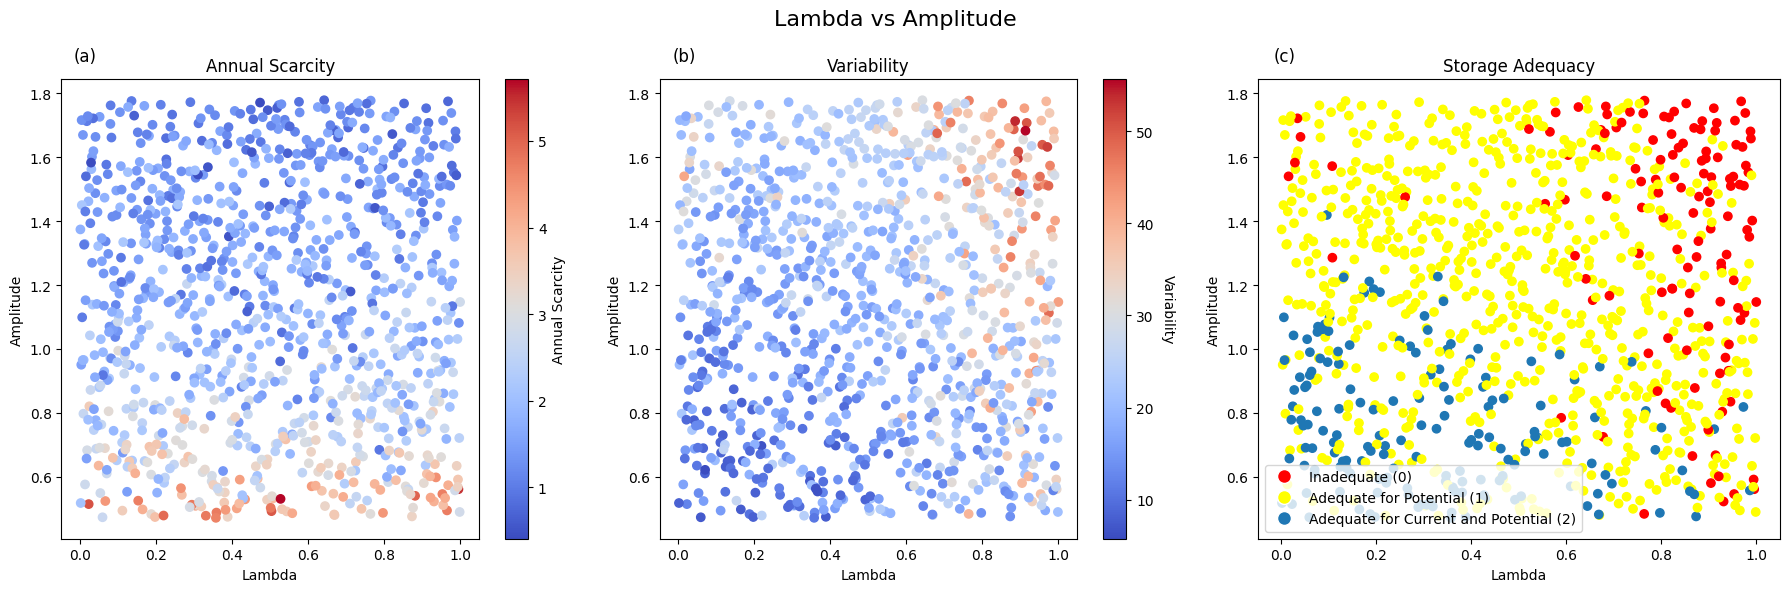

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

def plot_lambda_vs_amplitude_updated_again(data, metrics, output_file):
    descriptive_labels = {
        'Deficit_Severity': 'Deficit Severity',
        'Surplus_Capacity': 'Surplus Capacity',
        'Variability': 'Variability'
    }
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle('Lambda vs Amplitude', fontsize=16)
    
    axs = axs.flatten()
    subplot_labels = ['(a)', '(b)', '(c)']
    
    for i, metric in enumerate(metrics):
        ax = axs[i]
        
        if metric == 'Annual_Scarcity':
            scatter = ax.scatter(data['Input_lambda'], data['Input_Amplitude'], 
                                 c=data[metric], cmap='coolwarm')
            ax.set_title(f'Annual Scarcity')
            plt.colorbar(scatter, ax=ax, label='Annual Scarcity')
        
        elif metric in ['Variability']:
            scatter = ax.scatter(data['Input_lambda'], data['Input_Amplitude'], 
                                 c=data[metric], cmap='coolwarm')
            ax.set_title(descriptive_labels[metric])
            cbar = plt.colorbar(scatter, ax=ax)
            cbar.set_label(descriptive_labels[metric], rotation=270, labelpad=15)
        
        elif metric == 'Storage_Adequacy_Points':
            colors = ['red' if val == 0 else 'yellow' if val == 1 else '#1f77b4' for val in data[metric]]
            scatter = ax.scatter(data['Input_lambda'], data['Input_Amplitude'], c=colors)
            ax.set_title('Storage Adequacy')
            
            from matplotlib.lines import Line2D
            legend_elements = [Line2D([0], [0], marker='o', color='w', label='Inadequate (0)',
                                      markerfacecolor='red', markersize=10),
                               Line2D([0], [0], marker='o', color='w', label='Adequate for Potential (1)',
                                      markerfacecolor='yellow', markersize=10),
                               Line2D([0], [0], marker='o', color='w', label='Adequate for Current and Potential (2)',
                                      markerfacecolor='#1f77b4', markersize=10)]
            ax.legend(handles=legend_elements, loc='best')
        
        ax.set_xlabel('Lambda')
        ax.set_ylabel('Amplitude')
        ax.text(0.03, 1.07, subplot_labels[i], transform=ax.transAxes, fontsize=12,
                verticalalignment='top', bbox=dict(boxstyle='round,pad=0.3', edgecolor='none', facecolor='white'))
    
    
    plt.tight_layout()
    #plt.savefig(output_file, bbox_inches='tight', dpi=600)
    #plt.close()
    plt.show()


results_folder = './Case3_checks_all_7_PP/6. results'
csv_file = os.path.join(results_folder, 'complete_results.csv')
data = pd.read_csv(csv_file)
metrics = metrics = ['Annual_Scarcity', 'Variability', 'Storage_Adequacy_Points']
output_file = 'case_3_final_scarcity_storage_adequacy.png'

plot_lambda_vs_amplitude_updated_again(data, metrics, output_file)


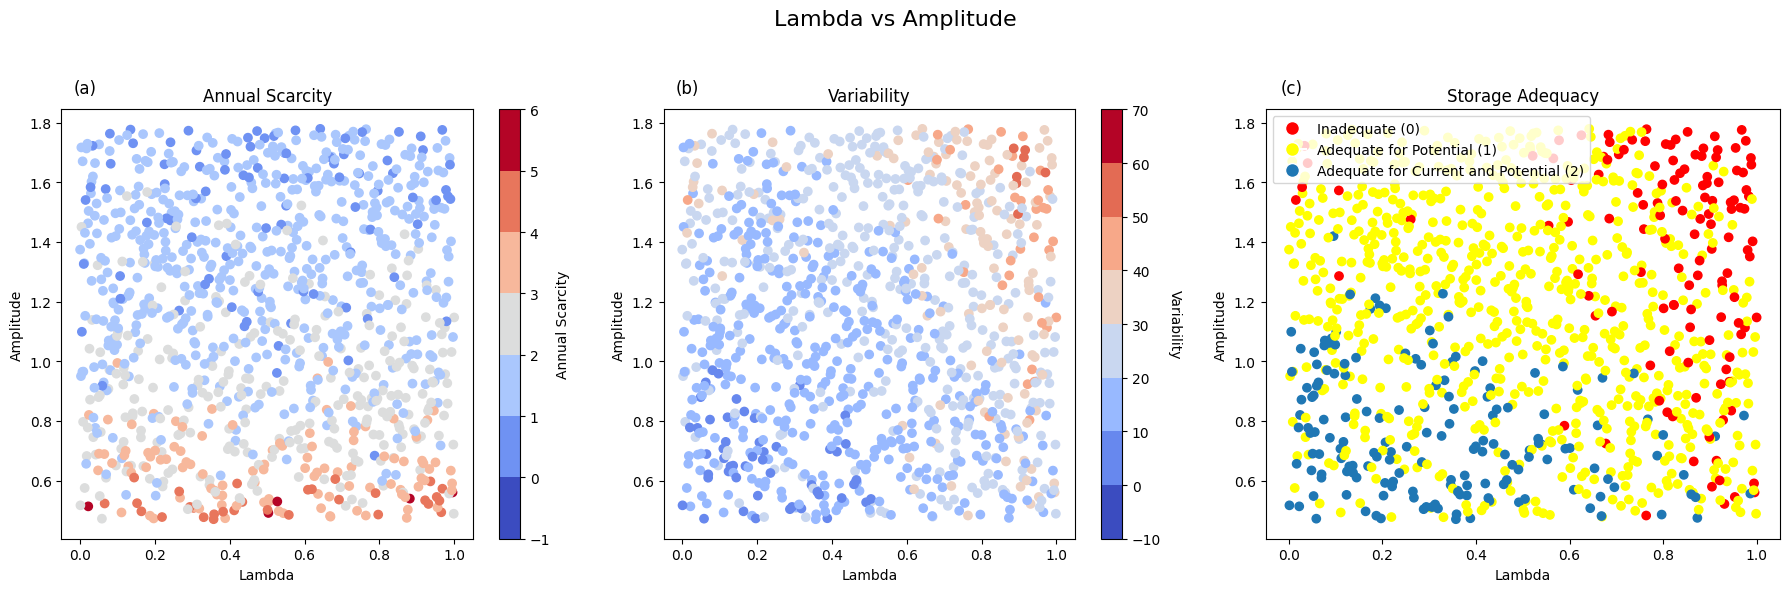

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from matplotlib.colors import LogNorm, BoundaryNorm

def plot_lambda_vs_amplitude_updated_again(data, metrics, output_file):
    descriptive_labels = {
        'Variability': 'Variability'
    }


    boundaries_linear = np.arange(-1, 7)  # -1 to 6
    cmap = plt.get_cmap('coolwarm')
    norm_linear = BoundaryNorm(boundaries_linear, ncolors=cmap.N, clip=True)

    boundaries_linear2 = np.arange(-10, 71, 10)  # Include 70 and go up to 71 to ensure 70 is included
    cmap2 = plt.get_cmap('coolwarm')
    norm_linear2 = BoundaryNorm(boundaries_linear2, ncolors=cmap2.N, clip=True)
    
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle('Lambda vs Amplitude', fontsize=16)
    
    axs = axs.flatten()  # Ensuring all axes are in a 1D array
    subplot_labels = ['(a)', '(b)', '(c)']  # Labels for the subplots
    
    for i, metric in enumerate(metrics):
        ax = axs[i]
        # Scatter plots for each metric
        if metric == 'Annual_Scarcity':
            scatter = ax.scatter(data['Input_lambda'], data['Input_Amplitude'], 
                                 c=data[metric], cmap='coolwarm', norm=norm_linear)
            ax.set_title('Annual Scarcity')
            plt.colorbar(scatter, ax=ax, label='Annual Scarcity')
        
        elif metric in ['Variability']:
            scatter = ax.scatter(data['Input_lambda'], data['Input_Amplitude'], 
                                 c=data[metric], cmap='coolwarm',norm=norm_linear2)
            ax.set_title(descriptive_labels[metric])
            cbar = plt.colorbar(scatter, ax=ax)
            cbar.set_label(descriptive_labels[metric], rotation=270, labelpad=15)
        
        elif metric == 'Storage_Adequacy_Points':
            colors = ['red' if val == 0 else 'yellow' if val == 1 else '#1f77b4' for val in data[metric]]
            scatter = ax.scatter(data['Input_lambda'], data['Input_Amplitude'], c=colors)
            ax.set_title('Storage Adequacy')
            # Custom legend
            from matplotlib.lines import Line2D
            legend_elements = [Line2D([0], [0], marker='o', color='w', label='Inadequate (0)',
                                      markerfacecolor='red', markersize=10),
                               Line2D([0], [0], marker='o', color='w', label='Adequate for Potential (1)',
                                      markerfacecolor='yellow', markersize=10),
                               Line2D([0], [0], marker='o', color='w', label='Adequate for Current and Potential (2)',
                                      markerfacecolor='#1f77b4', markersize=10)]
            ax.legend(handles=legend_elements, loc='best')
        
        ax.set_xlabel('Lambda')
        ax.set_ylabel('Amplitude')
        # Setting subplot labels as requested
        ax.text(0.03, 1.07, subplot_labels[i], transform=ax.transAxes, fontsize=12,
                verticalalignment='top', bbox=dict(boxstyle='round,pad=0.3', edgecolor='none', facecolor='white'))
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the layout to not overlap with title
    # Uncomment the next line to save the figure
    # plt.savefig(output_file, bbox_inches='tight', dpi=600)
    plt.show()

# Load your data
results_folder = './Case3_checks_all_7_PP/6. results'
csv_file = os.path.join(results_folder, 'complete_results.csv')
data = pd.read_csv(csv_file)
metrics = ['Annual_Scarcity', 'Variability', 'Storage_Adequacy_Points']
output_file = 'case_3_final_scarcity_storage_adequacy.png'

plot_lambda_vs_amplitude_updated_again(data, metrics, output_file)
